In [45]:
## Require Library to run this project

# !pip install matplotlib
# !pip install seaborn 
# !pip install scikit-learn
# !pip install pandas

In [15]:
# Import installed library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

1) Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán;

Number of vendor:  30


<Axes: title={'center': 'Vendor Counts'}, xlabel='Vendor', ylabel='Count'>

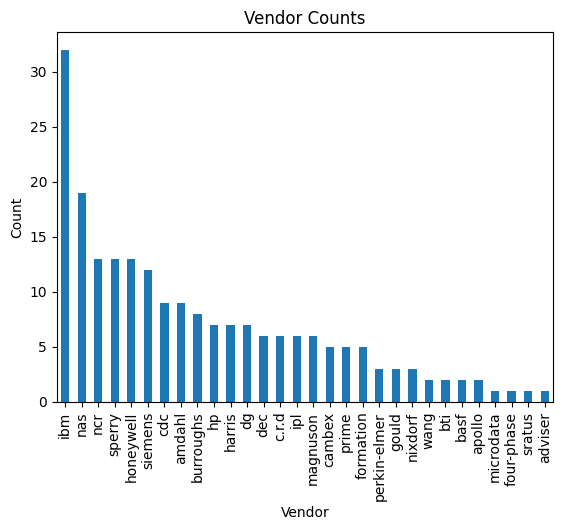

In [2]:
title = ['vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv('machine.data')

# Use the values in the first row as a new row of data
data.loc[-1] = data.columns
data.index = data.index + 1
data = data.sort_index()

# Set the column names using the provided 'title' list
data.columns = title

# Some inforation about how naming it
#    1. vendor name: 30 
#       (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
#        dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
#        microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
#        sratus, wang)
#    2. Model Name: many unique symbols
#    3. MYCT: machine cycle time in nanoseconds (integer)
#    4. MMIN: minimum main memory in kilobytes (integer)
#    5. MMAX: maximum main memory in kilobytes (integer)
#    6. CACH: cache memory in kilobytes (integer)
#    7. CHMIN: minimum channels in units (integer)
#    8. CHMAX: maximum channels in units (integer)
#    9. PRP: published relative performance (integer)
#   10. ERP: estimated relative performance from the original article (integer)

data.head()

# Print the data
vendors = data.iloc[:, 0].value_counts()
print("Number of vendor: ", len(vendors))
vendors.plot(kind='bar', xlabel='Vendor', ylabel='Count', title='Vendor Counts')


2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;

In [19]:
# Data Cleaning
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())
data.drop_duplicates(inplace=True)
print("Number of duplicate rows removed:", duplicate_rows.sum())

# Data Transformation
label_encoder = LabelEncoder()
data['Model Name'] = label_encoder.fit_transform(data['Model Name'])

# Data normalizing
scaler = MinMaxScaler()
columns_to_normalize = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

Number of duplicate rows: 0
Number of duplicate rows removed: 0


,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,7,0.072825,0.006012,0.092843,1.000000,0.307692,0.727273,0.167832,0.150450
1,amdahl,20,0.008092,0.248497,0.499499,0.124951,0.153846,0.181818,0.229895,0.194603
2,amdahl,20,0.008092,0.248497,0.499499,0.124951,0.153846,0.181818,0.187063,0.194603
3,amdahl,20,0.008092,0.248497,0.499499,0.124951,0.153846,0.181818,0.145105,0.194603
4,amdahl,20,0.008092,0.248497,0.249249,0.124951,0.153846,0.090909,0.110140,0.095666


In [22]:
# Split traning
X = data.values[:,1:]
y = data.values[:,0]

# Split the data to traning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Model (Ensemble)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


# Evaluate the models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

# Print the report about the detail and performance of the models
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Decision Tree Accuracy: 0.5471698113207547
Random Forest Accuracy: 0.6981132075471698

Decision Tree Classification Report:
               precision    recall  f1-score   support

     adviser       0.00      0.00      0.00         1
      amdahl       0.33      1.00      0.50         2
      apollo       0.00      0.00      0.00         2
        basf       0.25      1.00      0.40         1
         bti       0.00      0.00      0.00         0
   burroughs       0.50      0.50      0.50         2
       c.r.d       1.00      1.00      1.00         1
      cambex       1.00      1.00      1.00         2
         cdc       0.00      0.00      0.00         2
         dec       0.50      1.00      0.67         1
          dg       0.00      0.00      0.00         2
   formation       1.00      1.00      1.00         1
  four-phase       0.00      0.00      0.00         1
      harris       1.00      1.00      1.00         1
   honeywell       1.00      1.00      1.00         2
          

C:\Users\kient\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kient\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kient\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

3)	Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán;

4)	Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán;

5)	Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không. 